# Selecting the best K for Kmeans clustering on Beer Recipes dataset

In [13]:
import numpy as np 
from numpy import mean, absolute
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from scipy.spatial import distance

In [10]:
#Read sample file
#Enter path to location of the file here
filename = "4_Beer_Recipes_KH.xlsx"

df = pd.read_excel(filename, sheet_name="Beer_Recipes")

In [11]:
#normalize the feature columns to be used in clustering. In this case, the first 4 columns won't be used.
cols = list(df.columns)[4:]
X = preprocessing.normalize(df[cols], norm='l1', axis=0)
#X = df[cols]


## Run kmeans clustering on the dataset with values for k ranging from 1-10

In [14]:

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(init='random',n_clusters=k, random_state=0).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


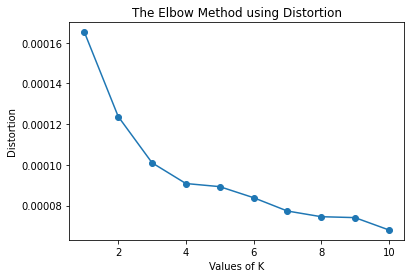

In [15]:

plt.plot(K, distortions, 'o-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


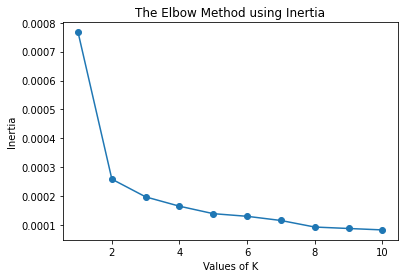

In [16]:

plt.plot(K, inertias, 'o-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 
